Aim

To design, implement, and evaluate a deep feedforward neural network for classifying Fashion MNIST images using PyTorch, and to understand the role of network depth, nonlinear activation functions, loss computation, and gradient-based learning in supervised classification.

#Importing libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

#Load and Preprocess Fashion MNIST

In [2]:
transform = transforms.ToTensor()

In [3]:
train_data = datasets.FashionMNIST(
    root="data", train=True, download=True, transform=transform
)

test_data = datasets.FashionMNIST(
    root="data", train=False, download=True, transform=transform
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 17.6MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 305kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 4.91MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.61MB/s]


In [4]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

#Deep Feedforward Neural Network

In [5]:
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)   # flatten
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

#Initialize Model

In [6]:
model = NeuralNet()

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

#Training the Network

In [7]:
epochs = 50

for epoch in range(epochs):
    total_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(images)
        loss = loss_fn(outputs, labels)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    print("Epoch:", epoch+1,
          "Loss:", round(total_loss, 3),
          "Accuracy:", round(100 * correct / total, 2), "%")

Epoch: 1 Loss: 594.116 Accuracy: 77.66 %
Epoch: 2 Loss: 401.509 Accuracy: 84.85 %
Epoch: 3 Loss: 355.234 Accuracy: 86.31 %
Epoch: 4 Loss: 326.022 Accuracy: 87.34 %
Epoch: 5 Loss: 306.556 Accuracy: 88.04 %
Epoch: 6 Loss: 294.389 Accuracy: 88.38 %
Epoch: 7 Loss: 280.311 Accuracy: 88.96 %
Epoch: 8 Loss: 269.066 Accuracy: 89.29 %
Epoch: 9 Loss: 257.911 Accuracy: 89.86 %
Epoch: 10 Loss: 250.005 Accuracy: 90.05 %
Epoch: 11 Loss: 242.726 Accuracy: 90.33 %
Epoch: 12 Loss: 231.959 Accuracy: 90.76 %
Epoch: 13 Loss: 224.438 Accuracy: 91.05 %
Epoch: 14 Loss: 218.724 Accuracy: 91.39 %
Epoch: 15 Loss: 213.508 Accuracy: 91.42 %
Epoch: 16 Loss: 205.171 Accuracy: 91.73 %
Epoch: 17 Loss: 201.459 Accuracy: 91.85 %
Epoch: 18 Loss: 192.853 Accuracy: 92.19 %
Epoch: 19 Loss: 188.646 Accuracy: 92.42 %
Epoch: 20 Loss: 185.949 Accuracy: 92.46 %
Epoch: 21 Loss: 181.633 Accuracy: 92.58 %
Epoch: 22 Loss: 174.685 Accuracy: 92.85 %
Epoch: 23 Loss: 169.688 Accuracy: 93.11 %
Epoch: 24 Loss: 168.746 Accuracy: 93.15 %
E

Interpretation of Results:


Learning Progress: The training loss decreased from 594.11 (Epoch 1) to 104.41 (Epoch 50), while the training accuracy increased from 77.66% to 95.76%. This indicates that the network minimized the loss and learned the underlying patterns of the Fashion MNIST training dataset using the Backpropagation algorithm.



In [8]:
model.eval()

NeuralNet(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
)

#Test the Model

In [9]:
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print("Test Accuracy:", round(100 * correct / total, 2), "%")

Test Accuracy: 89.13 %


Training vs. Testing Accuracy:

Training Accuracy (95.7%): The model became very good at identifying the images it studied during training.

Test Accuracy (89.1%): When shown new images it had never seen before, it was still accurate, but slightly less so than during training.

- The gap between 95% and 89% is due to Overfitting. This means the model started to memorize the specific training images rather than just learning general rules. It memorized the training data so well, it struggled when applying those specific rules to the new images.

#Visualization

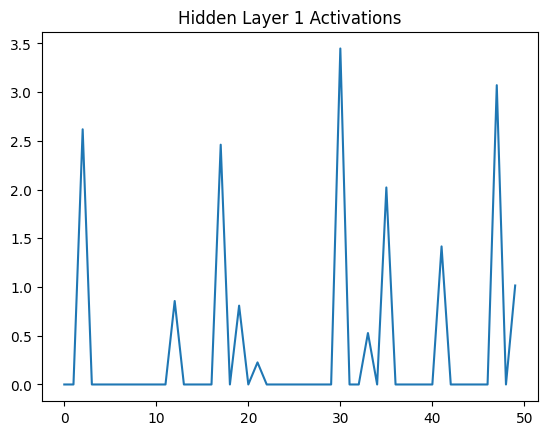

In [13]:
import matplotlib.pyplot as plt

images, labels = next(iter(test_loader))
sample = images[0]

with torch.no_grad():
    x = sample.view(1, -1)
    a1 = torch.relu(model.fc1(x))
    a2 = torch.relu(model.fc2(a1))
    a3 = torch.relu(model.fc3(a2))

plt.plot(a1[0][:50])
plt.title("Hidden Layer 1 Activations")
plt.show()

Interpretation

The graph shows the activations of neurons in the first hidden layer for a single Fashion MNIST image.

Each point in the graph represents one neuron in the hidden layer and how strongly it responds to the input image.

Higher peaks mean that the neuron is highly activated and has detected some important feature in the image.

Values near zero mean that the neuron did not find anything useful for that image.

Since ReLU activation is used, all negative values are converted to zero, which is why many points lie on the zero line.

##Advanced Task 1

In [15]:
class FlexibleNN(nn.Module):
    def __init__(self, hidden_layers):
        super().__init__()
        self.layers = nn.ModuleList()

        input_size = 28 * 28
        for neurons in hidden_layers:
            self.layers.append(nn.Linear(input_size, neurons))
            input_size = neurons

        self.output = nn.Linear(input_size, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        for layer in self.layers:
            x = torch.relu(layer(x))
        x = self.output(x)
        return x

#Training function

In [16]:
def train_model(model, train_loader, epochs=3):
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(epochs):
        correct = 0
        total = 0

        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        print(f"Epoch {epoch+1}, Accuracy: {100*correct/total:.2f}%")


#Train models with different depths

In [17]:
print("1 Hidden Layer")
model1 = FlexibleNN([128])
train_model(model1, train_loader)

print("\n3 Hidden Layers")
model3 = FlexibleNN([128, 64, 32])
train_model(model3, train_loader)

print("\n5 Hidden Layers")
model5 = FlexibleNN([128, 64, 64, 32, 16])
train_model(model5, train_loader)


1 Hidden Layer
Epoch 1, Accuracy: 80.99%
Epoch 2, Accuracy: 85.70%
Epoch 3, Accuracy: 87.05%

3 Hidden Layers
Epoch 1, Accuracy: 77.91%
Epoch 2, Accuracy: 85.62%
Epoch 3, Accuracy: 86.97%

5 Hidden Layers
Epoch 1, Accuracy: 73.96%
Epoch 2, Accuracy: 83.93%
Epoch 3, Accuracy: 86.17%


1 Hidden Layer

Reached 87.05% accuracy by Epoch 3.

Learns faster because the network is simple and easy to optimize.



3 Hidden Layers

Started with slightly lower accuracy in Epoch 1 but Gradually improved by 86.97%.


5 Hidden Layers

Had the lowest accuracy initially.

Accuracy increased but reached only 86.17% by Epoch 3.

#Advanced Task 2

In [18]:
class ActivationNN(nn.Module):
    def __init__(self, activation):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.activation = activation

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

#Train with different activations

In [19]:
activations = {
    "ReLU": nn.ReLU(),
    "Sigmoid": nn.Sigmoid(),
    "Tanh": nn.Tanh(),
    "LeakyReLU": nn.LeakyReLU()
}

for name, act in activations.items():
    print("\nActivation:", name)
    model = ActivationNN(act)
    train_model(model, train_loader)


Activation: ReLU
Epoch 1, Accuracy: 80.41%
Epoch 2, Accuracy: 85.83%
Epoch 3, Accuracy: 87.25%

Activation: Sigmoid
Epoch 1, Accuracy: 71.92%
Epoch 2, Accuracy: 84.92%
Epoch 3, Accuracy: 86.65%

Activation: Tanh
Epoch 1, Accuracy: 81.61%
Epoch 2, Accuracy: 86.52%
Epoch 3, Accuracy: 87.69%

Activation: LeakyReLU
Epoch 1, Accuracy: 80.34%
Epoch 2, Accuracy: 85.86%
Epoch 3, Accuracy: 87.38%


1. ReLU and Leaky ReLU showed faster convergence and higher accuracy.

2. Sigmoid and Tanh trained slower due to vanishing gradient problems.

3. This confirms why ReLU-based activations are preferred in deep neural networks.

4. ReLU helps the network learn quickly by passing only useful signals forward.

5. Sigmoid compresses values between 0 and 1, which slows learning and weakens gradients.

6. Tanh is better than Sigmoid but still suffers from saturation for large values.

7. Leaky ReLU prevents neurons from becoming inactive and keeps learning stable.





